# Laboratorio de evaluación de modelos de aprendizaje supervisado

Realice los siguientes ejercicios para consolidar sus conocimientos y comprensión de la evaluación de modelos de aprendizaje supervisado.

In [878]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Evaluación de modelos de regresión

In [879]:
# Cargar dataset
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

# Cargar el conjunto de datos de Boston desde fetch_openml
boston = fetch_openml(data_id=531)
X, y = boston.data, boston.target
features = boston.feature_names

X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

In [880]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

## 1. Divida este conjunto de datos en conjuntos de train (80%) y de test (20%).

El campo `MEDV` representa el valor medio de las viviendas ocupadas por sus propietarios (en miles de dólares) y es la variable objetivo que queremos predecir.

In [881]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [882]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(404, 13) (102, 13)
(404,) (102,)


## 2. Entrene un modelo `LinearRegression` en este conjunto de datos y genere predicciones tanto en el conjunto de entrenamiento como en el de prueba.

In [883]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

## 3. Calcule e imprima R-cuadrado tanto para el conjunto de entrenamiento como para el de prueba.

In [884]:
from sklearn.metrics import r2_score

train_score = r2_score(y_train, y_pred_train)
test_score = r2_score(y_test, y_pred_test)

print(f'train: {train_score}')
print(f'test: {test_score}')

train: 0.7320190224891145
test: 0.7361530040499449


## 4. Calcule e imprima el error cuadrático medio para el conjunto de entrenamiento y de prueba.

In [885]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'mse_train: {mse_train}')
print(f'mse_test: {mse_test}')

mse_train: 19.946075166647915
mse_test: 32.42658480581749


## 5. Calcule e imprima el error medio absoluto para el conjunto de entrenamiento y de prueba.

In [886]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'mae_train: {mse_train}')
print(f'mae_test: {mse_test}')

mae_train: 19.946075166647915
mae_test: 32.42658480581749


## Evaluación del modelo de clasificación

In [887]:
from sklearn.datasets import load_iris

data = load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [888]:
X_c = pd.DataFrame(data["data"], columns=data["feature_names"])
y_c = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X_c, y_c], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Divida este conjunto de datos en conjuntos de train (80%) y de test (20%).

El campo `class` representa el tipo de flor y es la variable objetivo que querremos predecir.

In [889]:
X_c = np.array(X_c, dtype=np.float64)
y_c = np.array(y_c, dtype=np.float64)

X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120, 1) (30, 1)


In [890]:
#! pip install plotly

In [891]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(8,8))
pd.options.plotting.backend = "plotly"
sns.set(rc={'figure.figsize':(6,6)});

<Figure size 576x576 with 0 Axes>

## 7. Entrene un modelo `LogisticRegression` en este conjunto de datos y genere predicciones tanto en el conjunto de entrenamiento como en el de prueba.

In [892]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(y_train_pred.shape, y_test_pred.shape)

(120,) (30,)


## 8. Calcule e imprima la puntuación de precisión tanto para el conjunto de entrenamiento como para el de pruebas.

    Esta función resuelve los ejercicios 8,9,10,11,12 y 13.

In [893]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(accuracy_train, accuracy_test)

0.9833333333333333 0.9666666666666667


## 9. Calcule e imprima la puntuación de precisión equilibrada tanto para el conjunto de entrenamiento como para el de pruebas.

In [894]:
from sklearn.metrics import balanced_accuracy_score

balanced_train = balanced_accuracy_score(y_train, y_train_pred)
balanced_test = balanced_accuracy_score(y_test, y_test_pred)
print(balanced_train, balanced_test)

0.982905982905983 0.9696969696969697


## 12. Calcule e imprima la puntuación F1 tanto para el conjunto de entrenamiento como para el de prueba.

In [895]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print(f1_train, f1_test)

0.9833392603129446 0.9664477285166941


## 13. Generar matrices de confusión tanto para el conjunto de entrenamiento como para el de pruebas.

In [896]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)


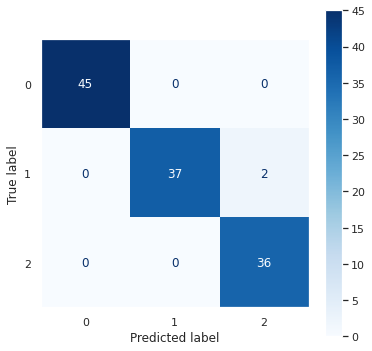

In [897]:
# Train confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

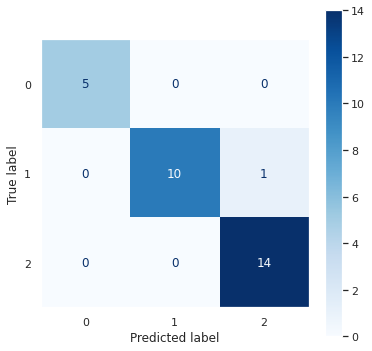

In [898]:
# Test confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

## Bonus: Para cada uno de los conjuntos de datos de este laboratorio, intente entrenar con algunos de los otros modelos que ha aprendido, vuelva a calcular las métricas de evaluación y compare para determinar qué modelos funcionan mejor en cada conjunto de datos.

In [899]:
# Your code here